In [1]:
import pandas as pd
import numpy as np

In [2]:
from qiime2 import Artifact

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
from statannotations.Annotator import Annotator  # puts significance values on box-type plots

In [4]:
from itertools import combinations

In [5]:
%matplotlib inline
sns.set(style='white')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['svg.fonttype'] = 'none'  # render SVG text as text, not curves
plt.rcParams['lines.markersize'] = 15

# load metadata

In [6]:
md = pd.read_csv('cohort1.metadata.tsv', sep='\t', index_col=0)
sorted(list(md.columns))

['barcode_id',
 'cage_id',
 'collection_date',
 'collection_time',
 'collection_timestamp',
 'collection_timestamp_24',
 'collection_timestamp_zt',
 'condition',
 'country',
 'description',
 'dna_extracted',
 'dob',
 'elevation',
 'empo_1',
 'empo_2',
 'empo_3',
 'empo_4',
 'env_biome',
 'env_feature',
 'env_material',
 'env_package',
 'geo_loc_name',
 'host_age',
 'host_age_units',
 'host_collection_age',
 'host_collection_age_units',
 'host_common_name',
 'host_life_stage',
 'host_scientific_name',
 'host_subject_id',
 'host_taxid',
 'host_weight',
 'host_weight_units',
 'iacuc_institute',
 'iacuc_protocol_id',
 'latitude',
 'life_stage',
 'longitude',
 'physical_specimen_location',
 'physical_specimen_remaining',
 'qiita_sample_type',
 'qiita_study_id',
 'replicate_sample',
 'sample_type',
 'scientific_name',
 'sex',
 'taxon_id',
 'title',
 'tube_id']

In [7]:
md.condition.value_counts()

BSH- VEHICLE      10
BSH- LETROZOLE    10
BSH+ VEHICLE      10
BSH+ LETROZOLE    10
Name: condition, dtype: int64

In [8]:
condition_order = [
    'BSH- VEHICLE',
    'BSH+ VEHICLE',
    'BSH- LETROZOLE',
    'BSH+ LETROZOLE',
]
condition_groups = list(
    combinations(condition_order,2)
)
condition_palette = {
    'BSH- VEHICLE': 'blue',
    'BSH+ VEHICLE': 'green',
    'BSH- LETROZOLE': 'orange',
    'BSH+ LETROZOLE': 'red',
}

In [9]:
alpha = Artifact.load('merged.core_metrics/shannon_vector.qza').view(pd.Series)
alpha.name = 'shannon_diversity'
md_alpha = md.join(alpha)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

BSH- VEHICLE vs. BSH+ VEHICLE: Mann-Whitney-Wilcoxon test two-sided, P_val:1.620e-01 U_stat=3.100e+01
BSH+ VEHICLE vs. BSH- LETROZOLE: Mann-Whitney-Wilcoxon test two-sided, P_val:5.390e-02 U_stat=2.400e+01
BSH- LETROZOLE vs. BSH+ LETROZOLE: Mann-Whitney-Wilcoxon test two-sided, P_val:2.123e-01 U_stat=6.700e+01
BSH- VEHICLE vs. BSH- LETROZOLE: Mann-Whitney-Wilcoxon test two-sided, P_val:1.133e-02 U_stat=1.600e+01
BSH+ VEHICLE vs. BSH+ LETROZOLE: Mann-Whitney-Wilcoxon test two-sided, P_val:5.708e-01 U_stat=4.200e+01
BSH- VEHICLE vs. BSH+ LETROZOLE: Mann-Whitney-Wilcoxon test two-sided, P_val:7.566e-02 U_stat=2.600e+01


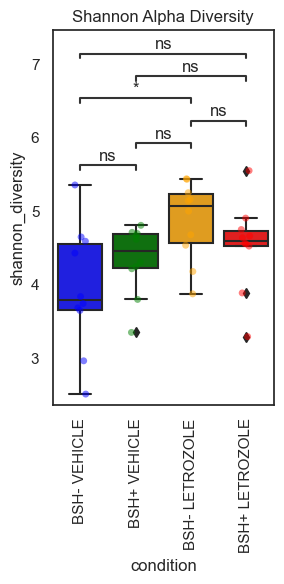

In [10]:
plt.subplots(figsize=(3,6))
comparison_pairs = condition_groups
plot_args = {
    'data': md_alpha,
    'y': 'shannon_diversity',
    'x': 'condition',
    'order': condition_order,
    'palette': condition_palette,
}
ax = sns.stripplot(dodge=True, alpha=0.5, color='0.3', **plot_args)
sns.boxplot(ax=ax, **plot_args,)
annotator = Annotator(ax, comparison_pairs, **plot_args)  # add statistics
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.title('Shannon Alpha Diversity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/alpha.shannon.genomes.svg')
plt.show()